## Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten

## Loading time-series dataset

In [ ]:
data = pd.read_csv('MLTempDataset.csv')
data.head()

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


## Preprocess data function




In [ ]:
def preprocess_data(data, target_col, sequence_length):
    data = data[['Datetime1', target_col]]
    data = data.sort_values(by=['Datetime1'])

    scaler = MinMaxScaler()
    data[target_col] = scaler.fit_transform(data[[target_col]])

    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data[target_col].values[i:i+sequence_length]
        label = data[target_col].values[i+sequence_length]
        sequences.append(seq)
        targets.append(label)

    sequences = np.array(sequences)
    targets = np.array(targets)

    return sequences, targets

## Sequence, Preprocess, Split data

In [ ]:
# Set sequence length and target column
sequence_length = 10
target_column = 'DAYTON_MW'

# Preprocess the data
X, y = preprocess_data(data, target_column, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RNN_MODEL

In [ ]:
def build_rnn_model(units, layer_type='LSTM'):
    model = Sequential()

    if layer_type == 'LSTM':
        print("Training LSTM model:")
        model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
    elif layer_type == 'GRU':
        print("Training GRU model:")
        model.add(GRU(units, input_shape=(X_train.shape[1], 1)))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_absolute_error')

    return model

## Train LSTM model

In [ ]:
lstm_model = build_rnn_model(units=50, layer_type='LSTM')
history_lstm = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Training LSTM model:
Epoch 1/10
134/134 [==============================] - 4s 13ms/step - loss: 0.1914 - val_loss: 0.1719
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1698 - val_loss: 0.1715
Epoch 3/10
134/134 [==============================] - 1s 9ms/step - loss: 0.1695 - val_loss: 0.1687
Epoch 4/10
134/134 [==============================] - 1s 10ms/step - loss: 0.1682 - val_loss: 0.1685
Epoch 5/10
134/134 [==============================] - 1s 10ms/step - loss: 0.1684 - val_loss: 0.1682
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1674 - val_loss: 0.1677
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1678 - val_loss: 0.1678
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1675 - val_loss: 0.1688
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1685 - val_loss: 0.1676
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 0

## Train GRU model

In [ ]:
gru_model = build_rnn_model(units=50, layer_type='GRU')
history_gru = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Training GRU model:
Epoch 1/10
134/134 [==============================] - 4s 11ms/step - loss: 0.1891 - val_loss: 0.1707
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1685 - val_loss: 0.1683
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1678 - val_loss: 0.1679
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1683 - val_loss: 0.1834
Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 0.1689 - val_loss: 0.1700
Epoch 6/10
134/134 [==============================] - 1s 11ms/step - loss: 0.1671 - val_loss: 0.1681
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1671 - val_loss: 0.1744
Epoch 8/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1678 - val_loss: 0.1689
Epoch 9/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1677 - val_loss: 0.1706
Epoch 10/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1

## Build a combination of 1D Convolutional and LSTM layers

In [ ]:
def build_conv_lstm_model(units, filters):
    model = Sequential()

    print("Training ConvLSTM model:")
    model.add(Conv1D(filters, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(units))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_absolute_error')

    return model

## Training combined model

In [ ]:
conv_lstm_model = build_conv_lstm_model(units=50, filters=32)
history_conv_lstm = conv_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Training ConvLSTM model:
Epoch 1/10
134/134 [==============================] - 4s 9ms/step - loss: 0.1904 - val_loss: 0.1691
Epoch 2/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1690 - val_loss: 0.1689
Epoch 3/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1687 - val_loss: 0.1679
Epoch 4/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1689 - val_loss: 0.1698
Epoch 5/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1678 - val_loss: 0.1735
Epoch 6/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1676 - val_loss: 0.1676
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 0.1672 - val_loss: 0.1735
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1689 - val_loss: 0.1685
Epoch 9/10
134/134 [==============================] - 1s 9ms/step - loss: 0.1675 - val_loss: 0.1680
Epoch 10/10
134/134 [==============================] - 1s 6ms/step - loss: 

## Evaluating models on the test set

In [ ]:
lstm_mae = lstm_model.evaluate(X_test, y_test)
gru_mae = gru_model.evaluate(X_test, y_test)
conv_lstm_mae = conv_lstm_model.evaluate(X_test, y_test)

print("LSTM MAE:", lstm_mae)
print("GRU MAE:", gru_mae)
print("ConvLSTM MAE:", conv_lstm_mae)

42/42 [==============================] - 0s 2ms/step - loss: 0.1658
LSTM MAE: 0.16569894552230835
GRU MAE: 0.16539506614208221
ConvLSTM MAE: 0.16583970189094543


In [ ]:
# Find the best model
best_model_name = min({"LSTM": lstm_mae, "GRU": gru_mae, "ConvLSTM": conv_lstm_mae}.items(), key=lambda x: x[1])[0]

# Print the best model's results
print(f"{best_model_name} Model MAE:", locals()[f"{best_model_name.lower()}_mae"])

GRU Model MAE: 0.16539506614208221


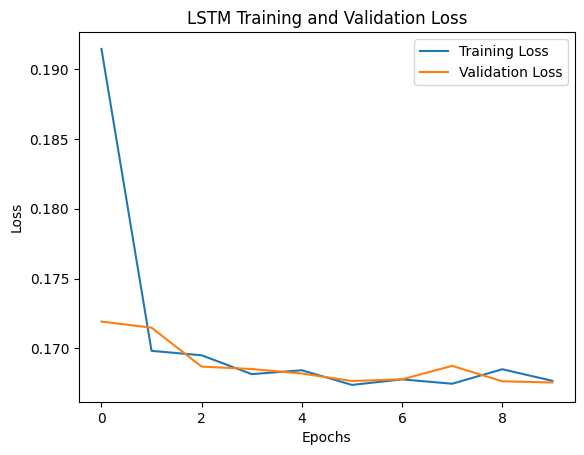

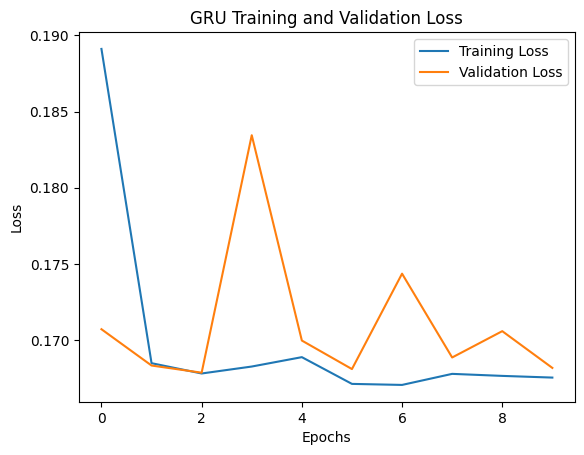

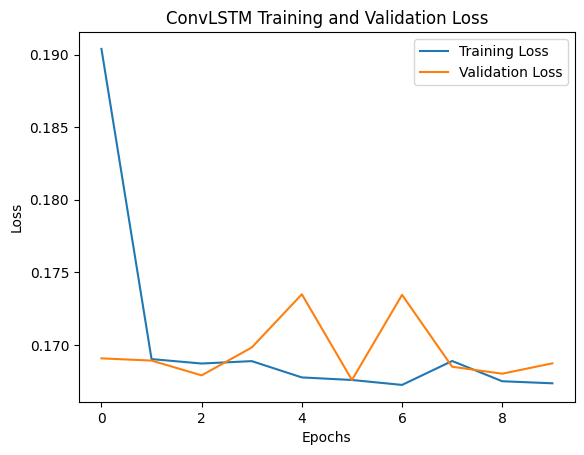

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot training history for each model
plot_history(history_lstm, 'LSTM')
plot_history(history_gru, 'GRU')
plot_history(history_conv_lstm, 'ConvLSTM')


In [ ]:
# Create a comparative table of model results
results_table = pd.DataFrame({
    'Model': ['LSTM', 'GRU', 'ConvLSTM'],
    'MAE on Test Set': [lstm_mae, gru_mae, conv_lstm_mae]
})

print("\nModel Results:")
print(results_table)


Model Results:
      Model  MAE on Test Set
0      LSTM         0.165699
1       GRU         0.165395
2  ConvLSTM         0.165840
